In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
url='https://raw.githubusercontent.com/theanalytix/DAInterns-CIEI/main/Datasets/netflix.csv'
df = pd.read_csv(url)

In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [27]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6229    False
6230    False
6231    False
6232    False
6233    False
Length: 6234, dtype: bool

In [28]:
df.duplicated().sum()

0

In [29]:
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

In [30]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

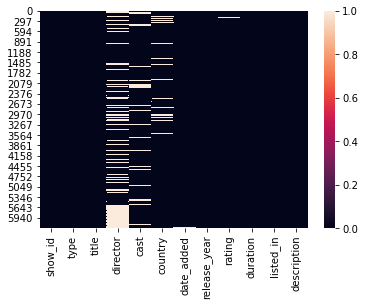

In [31]:
sns.heatmap(df.isnull())

In [32]:
df['director'].fillna('No Director',inplace=True)
df['cast'].fillna('No Cast',inplace=True)
df['country'].fillna('No Country',inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

In [33]:
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

<AxesSubplot:>

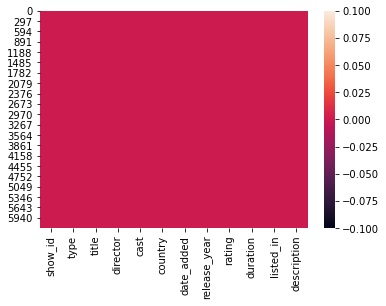

In [34]:
sns.heatmap(df.isnull())

In [38]:
movies = df[df['type'].isin(['Movie'])]
shows = df[df['type'].isin(['TV Show'])]

In [49]:
df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

Text(0.5, 1.0, 'The Content Types')

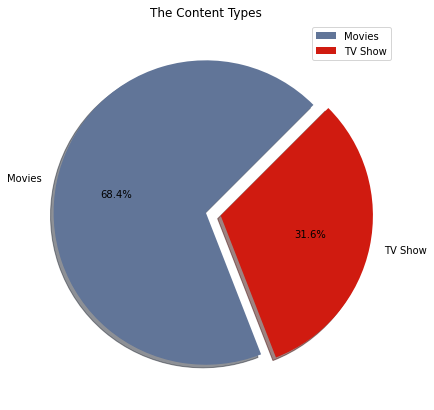

In [52]:
#Which category is more- Movies or TV Show?
plt.figure(figsize=(12,7))
color = ['#617598','#D01B10']
explode = [0,0.1]
plt.pie(df['type'].value_counts(),explode=explode,labels=['Movies','TV Show'],colors=color,startangle=45,autopct='%1.1f%%',shadow=True)
plt.legend()
plt.title('The Content Types')


Text(0.5, 1.0, 'Ratings for Movies')

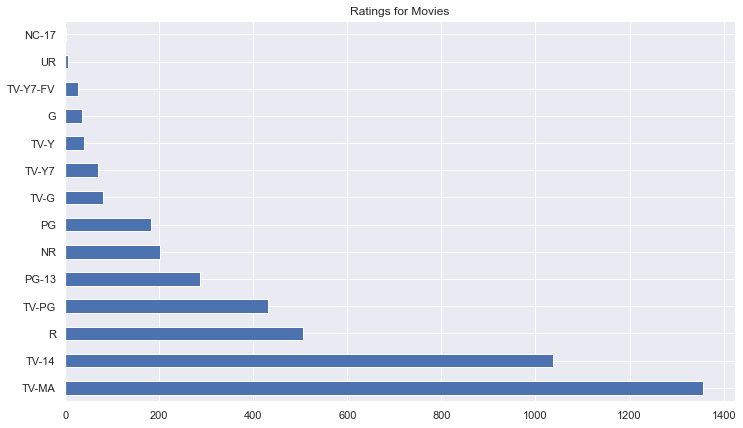

In [63]:
#Targeted audience for movies and TV shows
#MOVIES
plt.figure(figsize=(12,7))
sns.set_theme()
movies = df[df['type'].isin(['Movie'])]
m_rating = movies['rating'].value_counts()
m_rating.plot.barh(stacked=True)
plt.title('Ratings for Movies')

Text(0.5, 1.0, 'Ratings for shows')

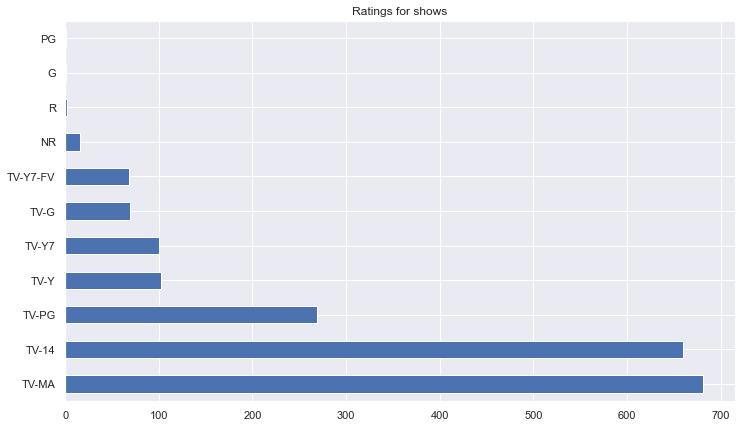

In [62]:
#SHOWS
plt.figure(figsize=(12,7))
sns.set_theme()
shows = df[df['type'].isin(['TV Show'])]
s_rating = shows['rating'].value_counts()
s_rating.plot.barh(stacked=True)
plt.title('Ratings for shows')

A:\AnacondaSetup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

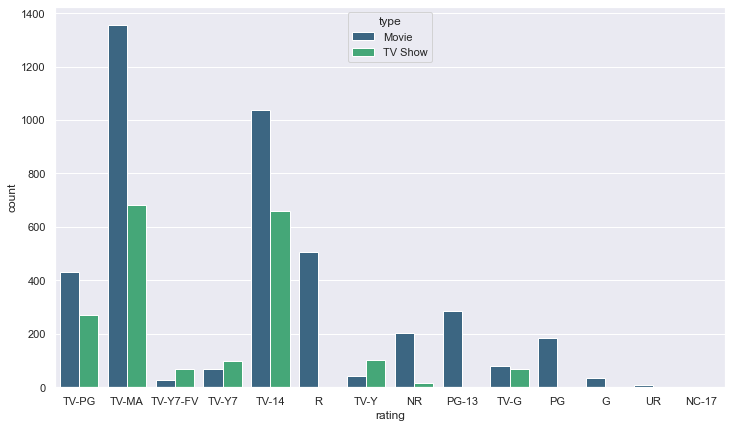

In [84]:
#comparison
plt.figure(figsize=(12,7))
sns.set_theme()
sns.countplot(df.rating, hue=df.type,palette='viridis')

Text(0.5, 1.0, 'THE MOST COMMON GENRES')

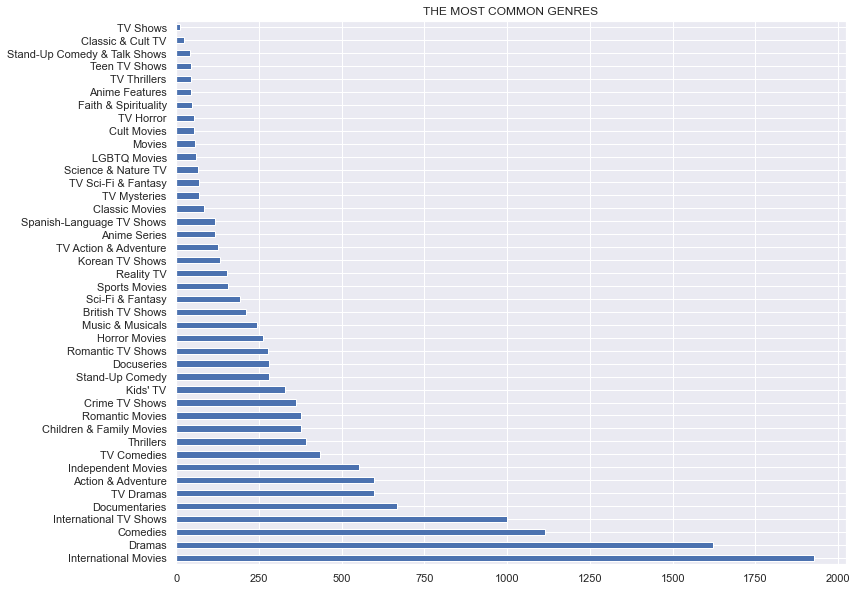

In [109]:
#THE MOST COMMON GENRES
sns.set_theme()
plt.figure(figsize=(12,10))
genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres.value_counts().plot(kind='barh',stacked=True)
plt.title('THE MOST COMMON GENRES')

Text(0.5, 1.0, 'COMMON MOVIE GENRES')

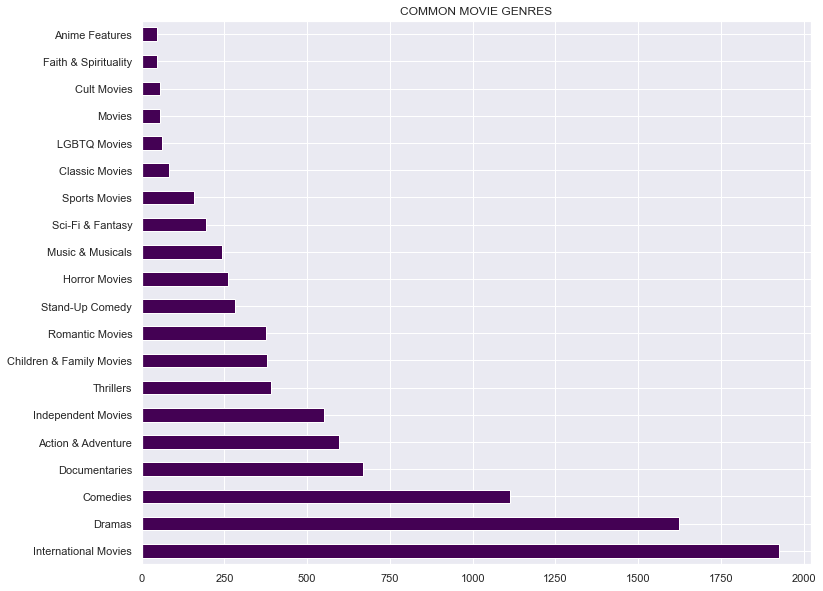

In [89]:
#Common Movies Genres
sns.set_theme()
plt.figure(figsize=(12,10))
movies = df[df['type'].isin(['Movie'])]
m_genres = movies.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
m_genres.value_counts().plot(kind='barh',stacked=True,cmap='viridis')
plt.title('COMMON MOVIE GENRES')

Text(0.5, 1.0, 'COMMON TV SHOW GENRES')

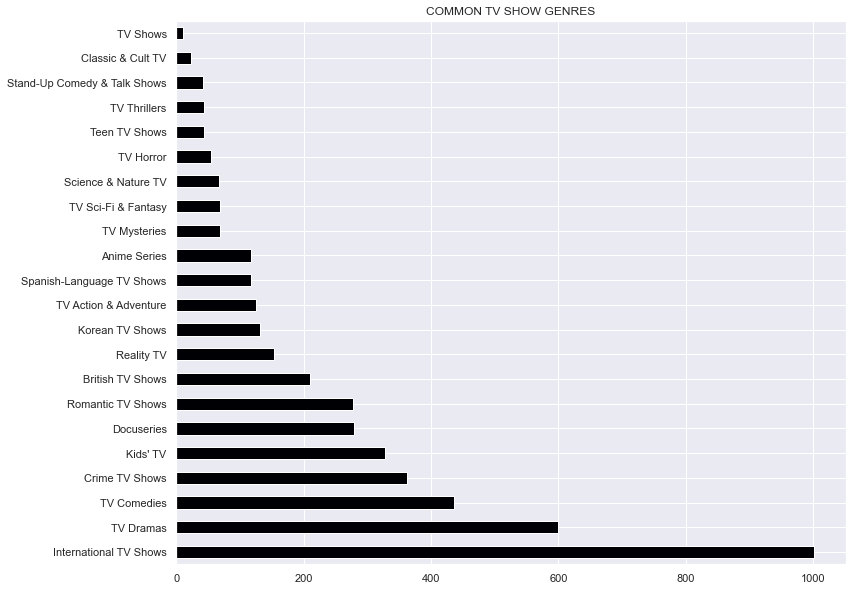

In [88]:
#Common TV Show genres
sns.set_theme()
plt.figure(figsize=(12,10))
shows = df[df['type'].isin(['TV Show'])]
s_genres = shows.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
s_genres.value_counts().plot(kind='barh',stacked=True,cmap='inferno')
plt.title('COMMON TV SHOW GENRES')

Text(0.5, 1.0, 'TOP 10 COMMON COUNTRIES')

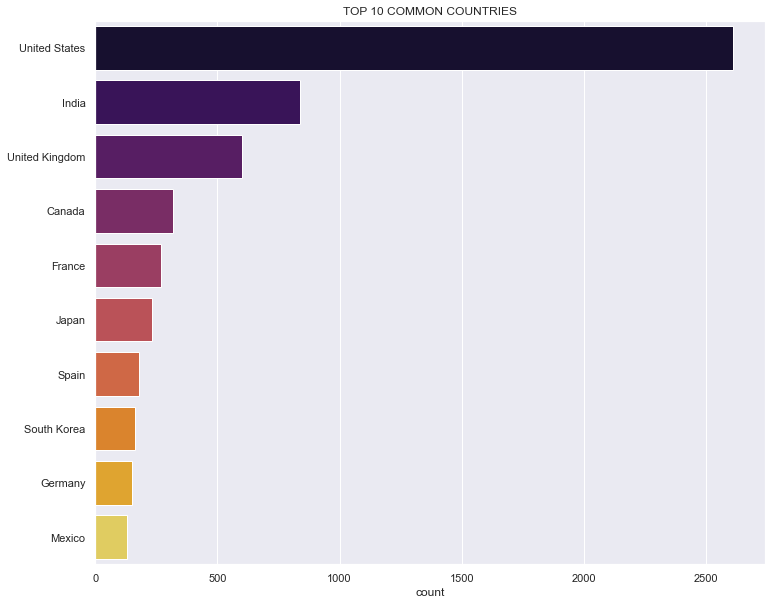

In [158]:
#LOCATION-WISE ANALYSIS
#TOP COUNTRIES LISTED
sns.set_theme()
plt.figure(figsize=(12,10))
countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
countries = countries[countries != 'No Country']
sns.countplot(y = countries, order=countries.value_counts().index[:10],palette='inferno')
plt.title('TOP 10 COMMON COUNTRIES')

Text(0.5, 1.0, 'TOP 10 COMMON DIRECTORS')

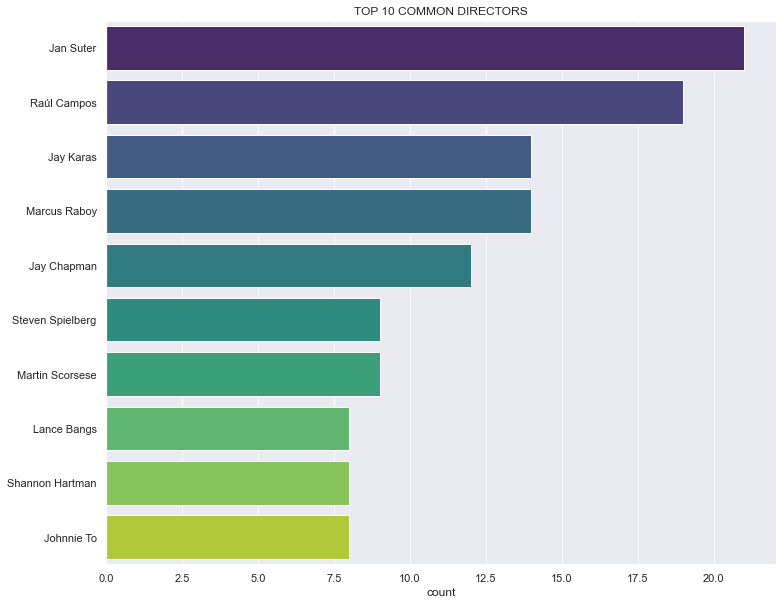

In [157]:
#COMMON DIRECTORS
sns.set_theme()
plt.figure(figsize=(12,10))
director = df.set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
director = director[director != 'No Director']
sns.countplot(y = director, order=director.value_counts().index[:10],palette='viridis')
plt.title('TOP 10 COMMON DIRECTORS')

Text(0.5, 1.0, 'TOP COUNTRIES FOR TV SHOWS')

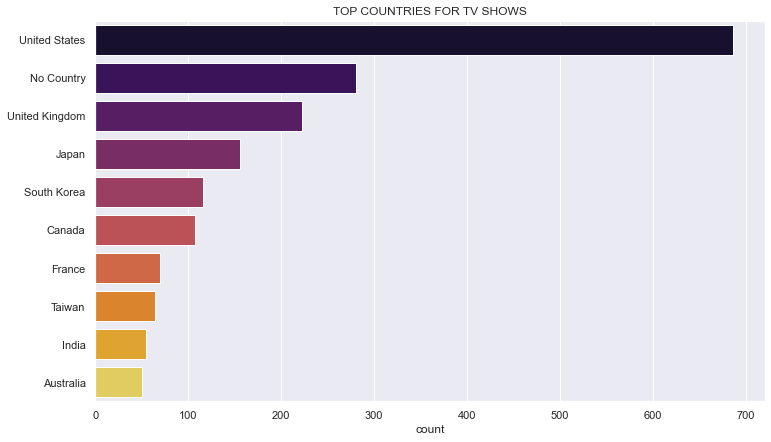

In [124]:
#TOP COUNTRIES FOR TV SHOWS
plt.figure(figsize=(12,7))
shows=df[df["type"]=='TV Show']
shows=shows.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = shows, order=shows.value_counts().index[:10],palette='inferno')
plt.title('TOP COUNTRIES FOR TV SHOWS')

Text(0.5, 1.0, 'TOP COUNTRIES FOR Movies')

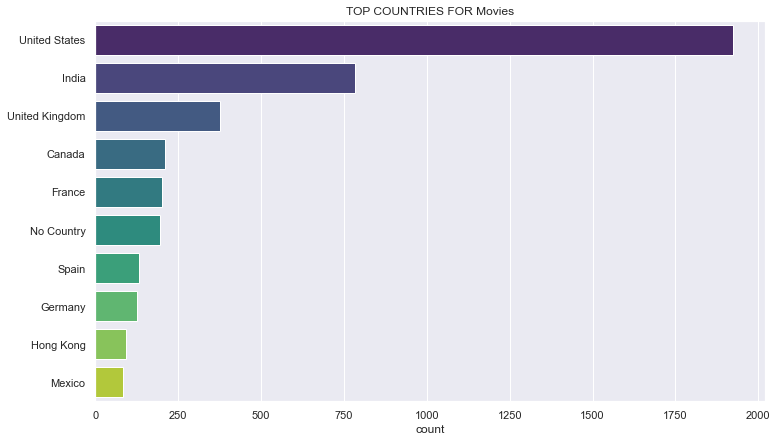

In [129]:
#TOP COUNTRIES FOR MOVIES
plt.figure(figsize=(12,7))
shows=df[df["type"]=='Movie']
shows=shows.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = shows, order=shows.value_counts().index[:10],palette='viridis')
plt.title('TOP COUNTRIES FOR Movies')

In [154]:
#YEAR-WISE ANALYSIS
movies = df[df['type'].isin(['Movie'])]
shows = df[df['type'].isin(['TV Show'])]
df.year_added = pd.DatetimeIndex(df.date_added).year
movies.year_added = pd.DatetimeIndex(movies.date_added).year
shows.year_added = pd.DatetimeIndex(shows.date_added).year
year = df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
year = year[year.year != 2020]
movies = movies.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
movies = movies[movies != 2020]
shows = shows.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
shows = shows[shows != 2020]

<ipython-input-154-490ec3ba5d2b>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  movies.year_added = pd.DatetimeIndex(movies.date_added).year
<ipython-input-154-490ec3ba5d2b>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  shows.year_added = pd.DatetimeIndex(shows.date_added).year


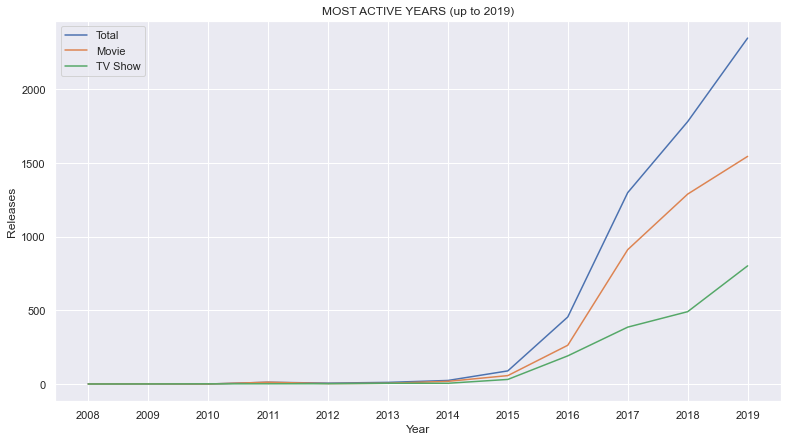

In [156]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=year, x='year', y='date_added')
sns.lineplot(data=movies, x='year', y='date_added')
sns.lineplot(data=shows, x='year', y='date_added')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("MOST ACTIVE YEARS (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()